In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 100.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "auto_class_weights": trial.suggest_categorical("auto_class_weights", [None, "Balanced", "SqrtBalanced"]),
        "verbose": 0,
        "random_seed": 42
    }

    model = CatBoostClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return np.mean(scores)

study = optuna.create_study(study_name = "catboost", direction="maximize", storage = "sqlite:///catboost.db")
study.optimize(objective, n_trials=50)

print("Best Accuracy: ", study.best_value)
print("Best Hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-30 22:49:10,259] A new study created in RDB with name: catboost
[I 2025-05-30 22:49:15,135] Trial 0 finished with value: 0.920314222074372 and parameters: {'iterations': 415, 'learning_rate': 0.011738801437157597, 'depth': 3, 'l2_leaf_reg': 0.16959126050742923, 'border_count': 98, 'random_strength': 5.2261227301297755, 'bagging_temperature': 0.08791730361286931, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.920314222074372.
[I 2025-05-30 22:49:19,073] Trial 1 finished with value: 0.9256719635645423 and parameters: {'iterations': 315, 'learning_rate': 0.1423607819183434, 'depth': 5, 'l2_leaf_reg': 11.891940716746214, 'border_count': 183, 'random_strength': 5.702010116930066, 'bagging_temperature':

Best Accuracy:  0.9266073939616006
Best Hyperparameters:
  iterations: 519
  learning_rate: 0.0214886155779932
  depth: 7
  l2_leaf_reg: 0.0041102106843915655
  border_count: 188
  random_strength: 1.1024738816675557
  bagging_temperature: 0.4400386588257677
  auto_class_weights: None


In [4]:
model = CatBoostClassifier(
    iterations = 519,
    learning_rate = 0.0214886155779932,
    depth = 7,
    l2_leaf_reg = 0.0041102106843915655,
    border_count = 188,
    random_strength = 1.1024738816675557,
    bagging_temperature = 0.4400386588257677,
    auto_class_weights = None
)
model.fit(X_train, Y_train)

0:	learn: 1.0639961	total: 162ms	remaining: 1m 24s
1:	learn: 1.0310320	total: 168ms	remaining: 43.5s
2:	learn: 1.0000101	total: 174ms	remaining: 29.9s
3:	learn: 0.9710013	total: 179ms	remaining: 23s
4:	learn: 0.9430014	total: 185ms	remaining: 19s
5:	learn: 0.9173230	total: 190ms	remaining: 16.3s
6:	learn: 0.8926254	total: 196ms	remaining: 14.3s
7:	learn: 0.8697379	total: 198ms	remaining: 12.6s
8:	learn: 0.8469561	total: 203ms	remaining: 11.5s
9:	learn: 0.8255461	total: 208ms	remaining: 10.6s
10:	learn: 0.8054946	total: 212ms	remaining: 9.81s
11:	learn: 0.7863809	total: 215ms	remaining: 9.09s
12:	learn: 0.7678225	total: 220ms	remaining: 8.55s
13:	learn: 0.7496066	total: 225ms	remaining: 8.11s
14:	learn: 0.7324258	total: 230ms	remaining: 7.71s
15:	learn: 0.7156027	total: 235ms	remaining: 7.38s
16:	learn: 0.6998051	total: 240ms	remaining: 7.08s
17:	learn: 0.6841728	total: 245ms	remaining: 6.81s
18:	learn: 0.6692031	total: 249ms	remaining: 6.57s
19:	learn: 0.6548114	total: 254ms	remaining:

In [5]:
res = model.predict(X_test)
print(res)
print(Y_test)

[[0]
 [1]
 [2]
 ...
 [2]
 [2]
 [2]]
       0
42222  0
29490  1
7168   2
35124  1
29931  2
...   ..
41573  2
22780  0
42708  2
28199  2
22171  2

[8819 rows x 1 columns]


In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.9223267944211362
              precision    recall  f1-score   support

           0   0.790031  0.784653  0.787333      1616
           1   0.792980  0.798204  0.795583      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.922327      8819
   macro avg   0.861004  0.860952  0.860972      8819
weighted avg   0.922323  0.922327  0.922322      8819



PermutationExplainer explainer: 8820it [31:06,  4.69it/s]                          
C:\Users\eddie\AppData\Local\Temp\ipykernel_8728\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


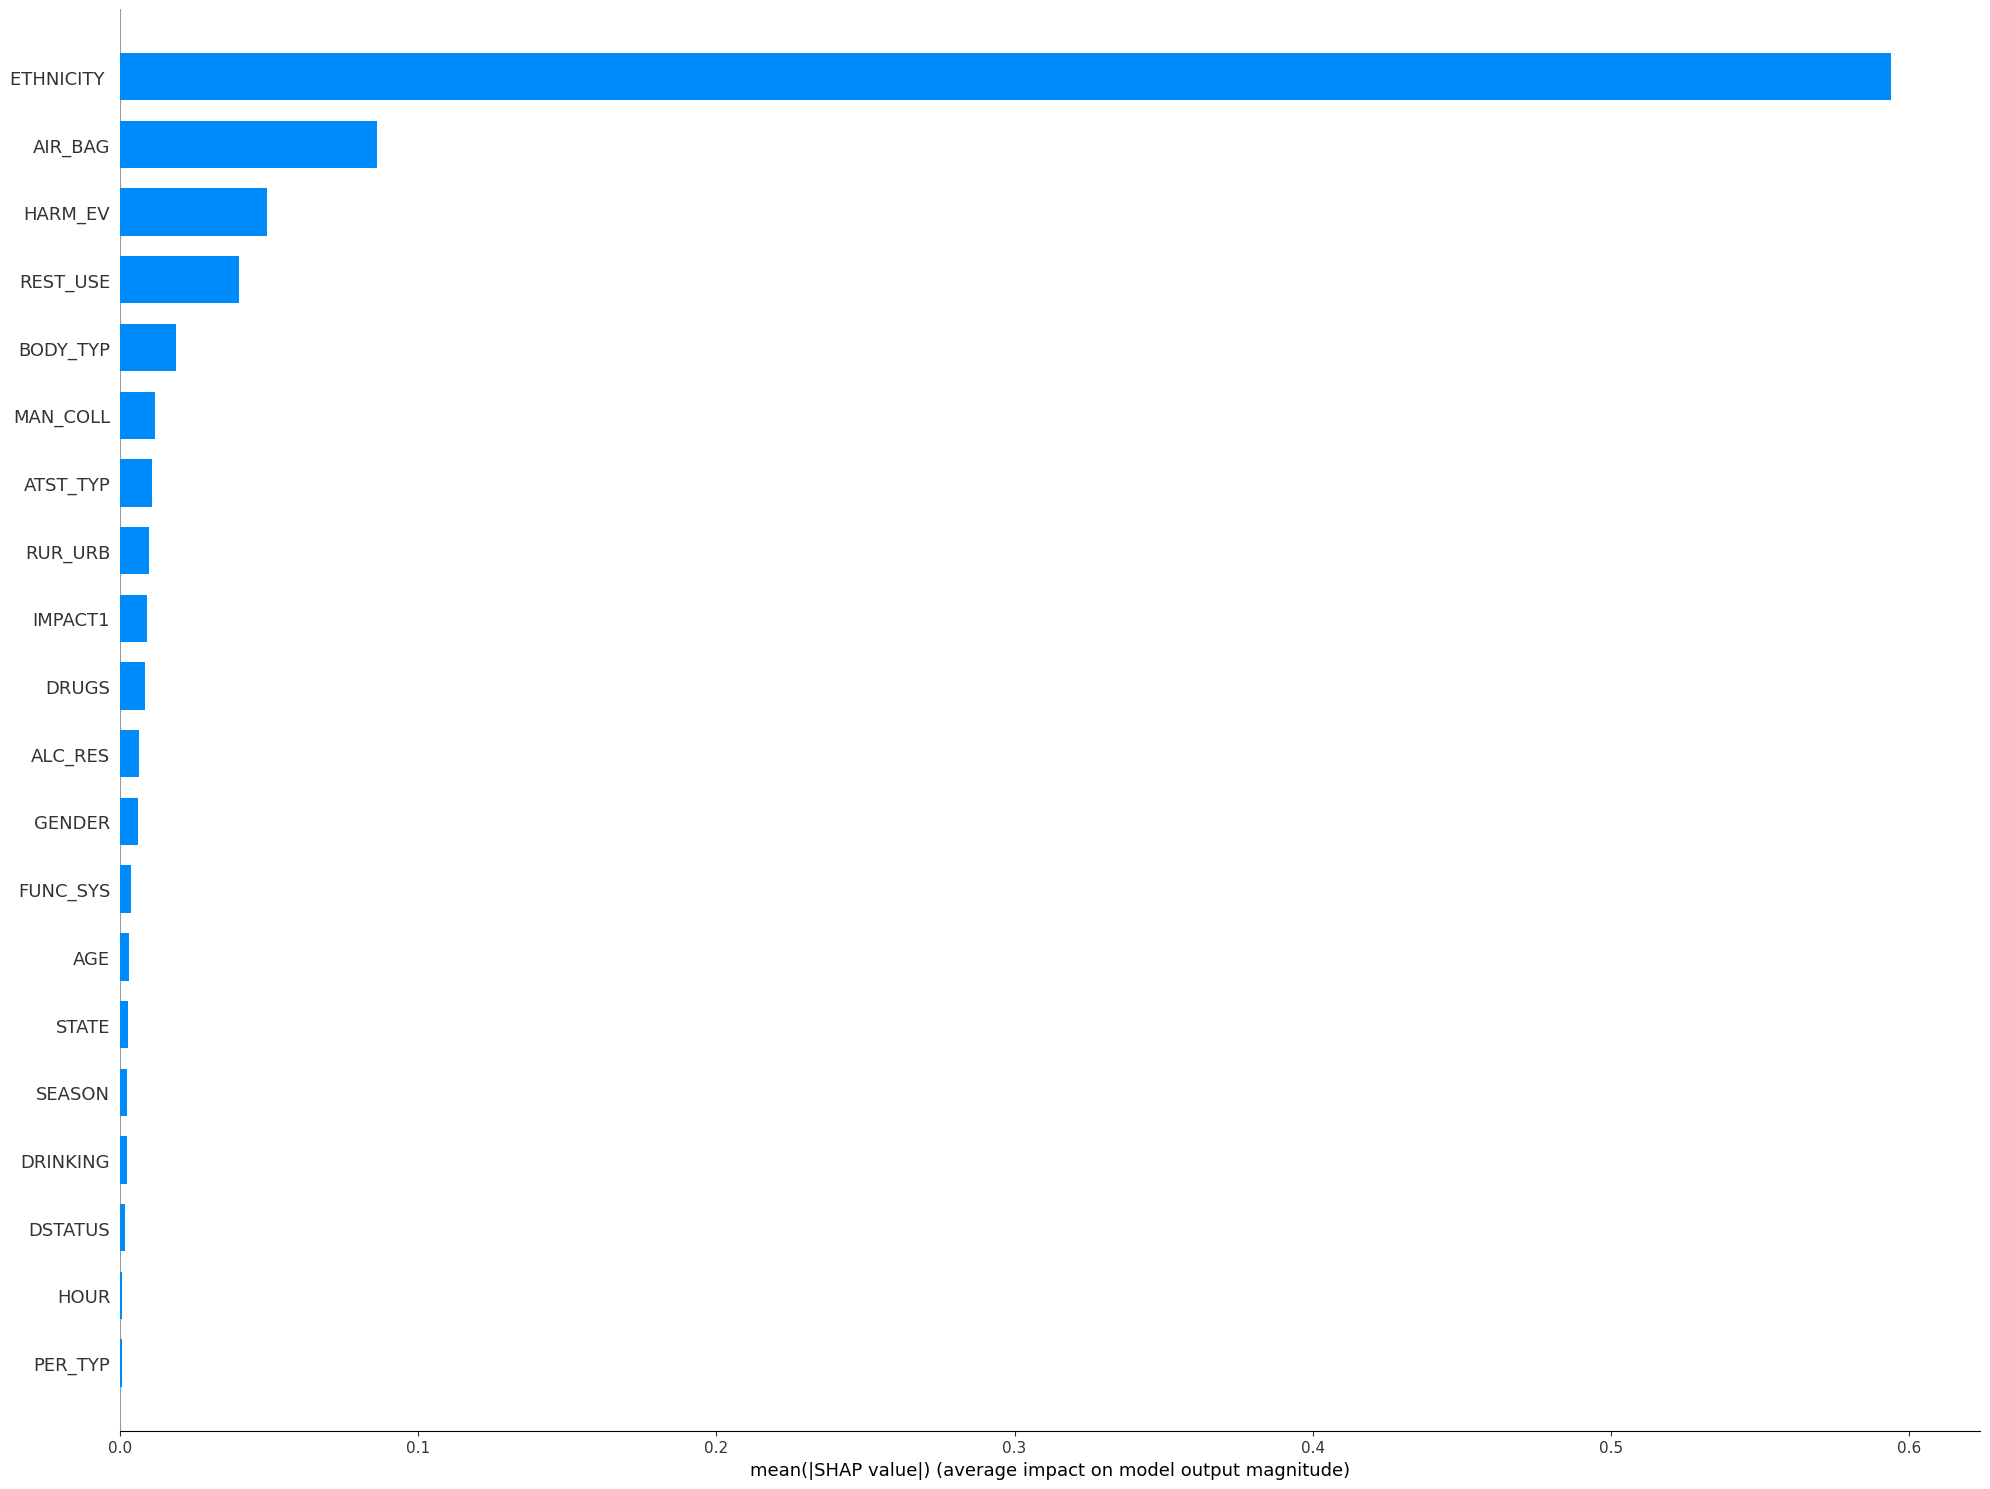

In [13]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

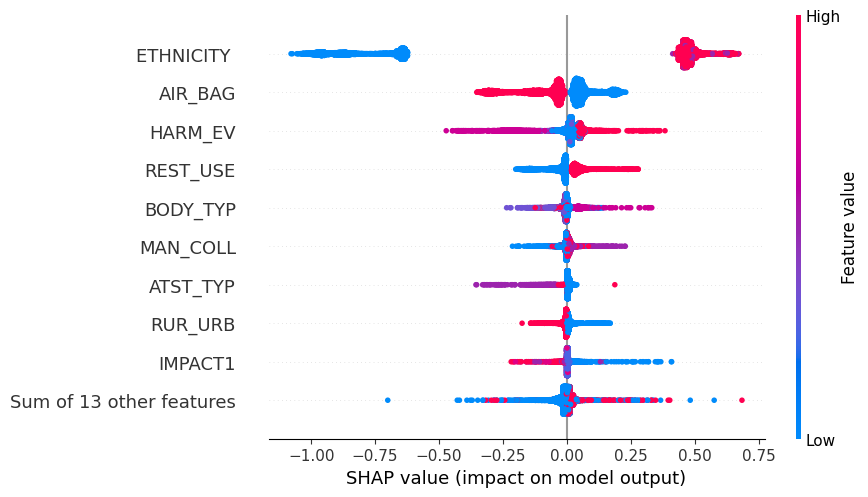

In [14]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

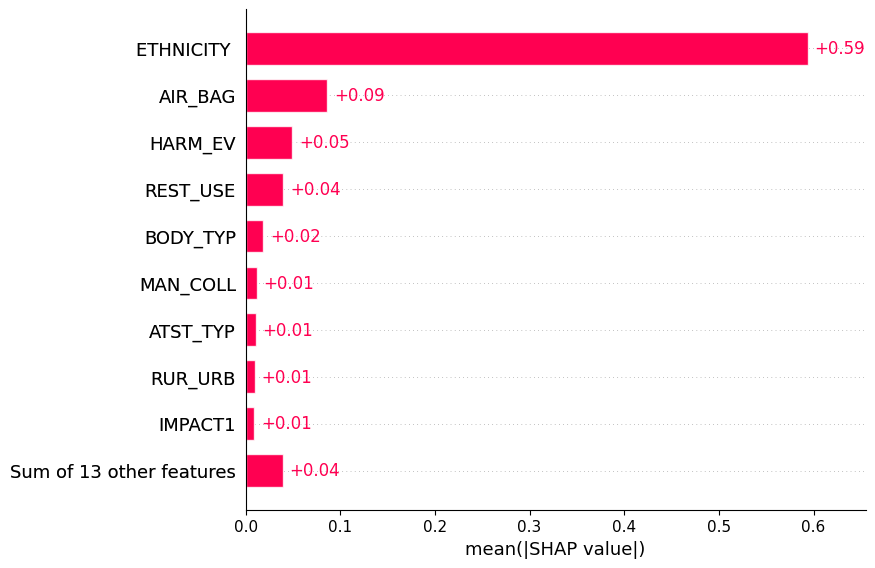

In [15]:
shap.plots.bar(explanation)

In [16]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/catboost/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [17]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    # shap.plots.waterfall(explanation[i], show=False)
    # shap.initjs()
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/catboost/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    # shap.save_html(os.path.join("shap/adaboost/force/", f"force_{i}.png"), force_plot)
    plt.close()


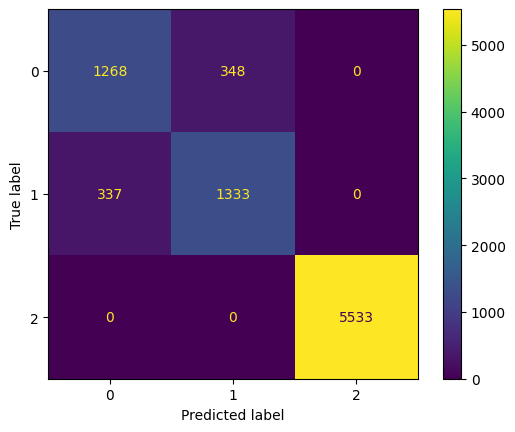

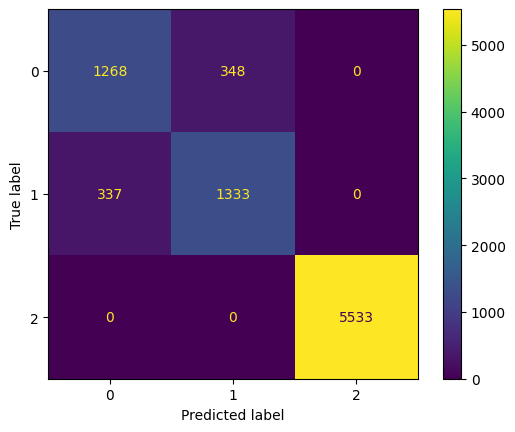

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()

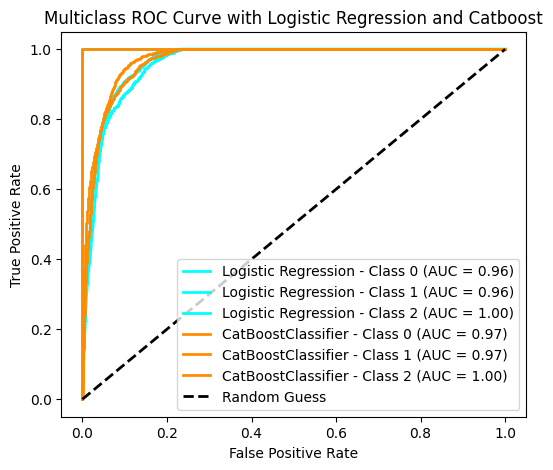

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, Y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = label_binarize(Y_test, classes=np.unique(Y_test))
models = [logistic_model, model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for m, color in zip(models, colors):
    for i in range(m.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], m.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        name = m.__class__.__name__
        if(m.__class__.__name__=="OneVsRestClassifier"):
            name = "Logistic Regression"
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{name} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Catboost')
plt.legend(loc="lower right")
plt.show()